In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [249]:
train_df = pd.read_csv("../input/train.csv")
print (train_df.describe())
print ("head: ", train_df.head())
#print (train_df.values)
print (train_df.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
('head: ',    PassengerId  Survived  Pclass  \
0            1         0       3  

# 1. Preprocessing data

In [250]:
sex_label = LabelEncoder().fit(train_df["Sex"])
train_df["Sex"] = sex_label.transform(train_df["Sex"])

In [251]:
embarked_label = LabelEncoder().fit(train_df['Embarked'])
train_df["Embarked"] = embarked_label.transform(train_df['Embarked'])
#print train_df.Embarked

## handle missing ages

In [252]:
## 1.  use ages'mean replace NaN
## replace NaN with -1
# train_df = train_df.fillna(-1)
# age_mean = train_df['Age'].mean()
# train_df['Age'] = train_df['Age'].map(lambda x : age_mean if x == -1 else x)

In [253]:
## 2. predict the mising age using randomforestregressor
def HandleMissingAge(data):
    age_df = data[[u'Age', u'Pclass', u'Sex', u'SibSp', u'Parch',u'Fare', u'Embarked']]
    missing_age = age_df.loc[(age_df.Age.isnull())]
    exist_age = age_df.loc[(age_df.Age.notnull())]
    
    y = exist_age.values[:, 0]
    X = exist_age.values[:, 1::]
    
    rfr = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    rfr.fit(X, y)
    predict_ages = rfr.predict(missing_age.values[:,1::])
    data.loc[(data.Age.isnull()), 'Age'] = predict_ages
    
    return data

train_df = HandleMissingAge(train_df)
print train_df

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

## scaler

In [254]:
scaler = StandardScaler()
train_df['Age'] = scaler.fit_transform(train_df['Age'])

scaler = StandardScaler()
train_df['Age'] = scaler.fit_transform(train_df['Fare'])
print train_df.describe()

       PassengerId    Survived      Pclass         Sex           Age  \
count   891.000000  891.000000  891.000000  891.000000  8.910000e+02   
mean    446.000000    0.383838    2.308642    0.647587  3.987333e-18   
std     257.353842    0.486592    0.836071    0.477990  1.000562e+00   
min       1.000000    0.000000    1.000000    0.000000 -6.484217e-01   
25%     223.500000    0.000000    2.000000    0.000000 -4.891482e-01   
50%     446.000000    0.000000    3.000000    1.000000 -3.573909e-01   
75%     668.500000    1.000000    3.000000    1.000000 -2.424635e-02   
max     891.000000    1.000000    3.000000    1.000000  9.667167e+00   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    2.529742  
std      1.102743    0.806057   49.693429    0.800254  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    2.000000  
50%      0.0000

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

# plot data

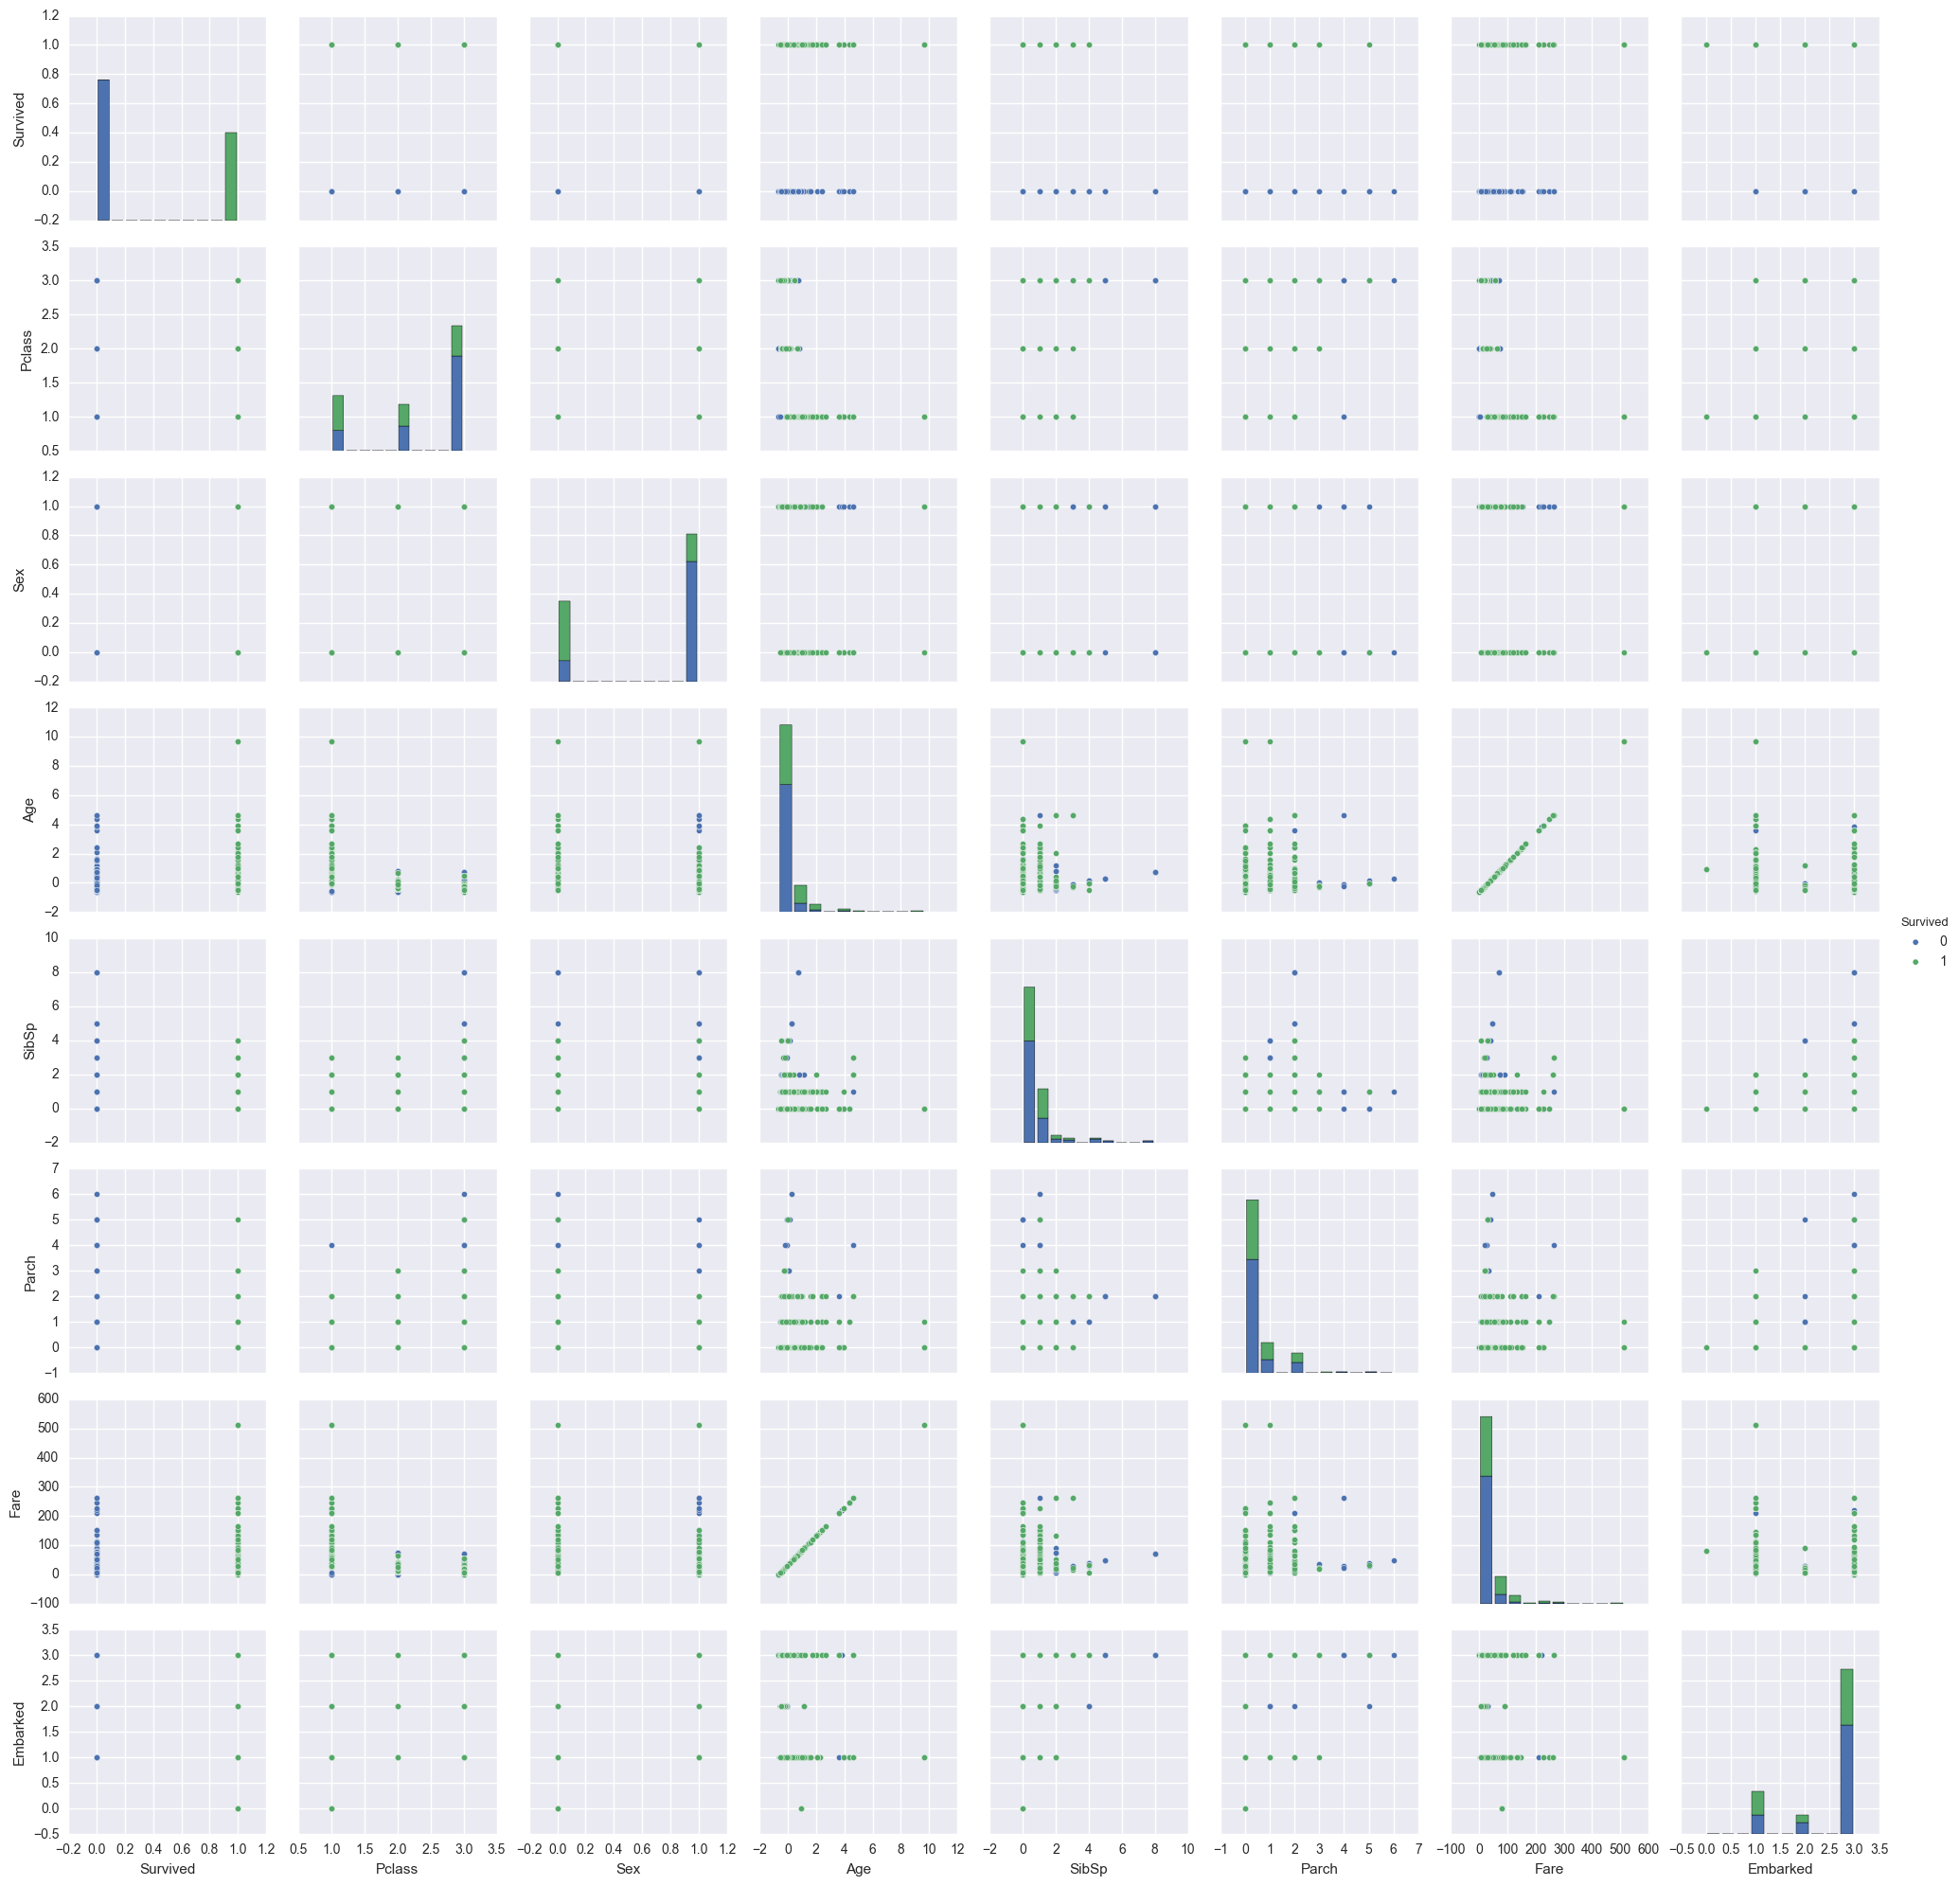

In [255]:
train_data = train_df.drop(["PassengerId", "Cabin", "Name", "Ticket"], axis=1)
sns.pairplot(train_data, hue="Survived")

In [256]:
y = train_df.Survived.values
X = train_df.drop(["PassengerId", "Cabin", "Name", "Survived", "Ticket"], axis=1)

In [257]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=2016, test_size=.3)

In [258]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
#lr.fit(train_X, train_y)
cross_val_score(lr, X, y, cv=10)

array([ 0.81111111,  0.77777778,  0.78651685,  0.84269663,  0.78651685,
        0.7752809 ,  0.7752809 ,  0.76404494,  0.82022472,  0.78409091])

In [264]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1)
cross_val_score(rfc, X, y, cv=10).mean()

0.79813528543865619

In [260]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
cross_val_score(svc, X, y, cv=10)

array([ 0.81111111,  0.78888889,  0.7752809 ,  0.84269663,  0.79775281,
        0.7752809 ,  0.76404494,  0.74157303,  0.80898876,  0.76136364])

In [261]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=2016)
cross_val_score(dtc, X, y, cv=10)

array([ 0.74444444,  0.72222222,  0.71910112,  0.82022472,  0.85393258,
        0.79775281,  0.82022472,  0.83146067,  0.83146067,  0.81818182])

In [262]:
from sklearn import svm
svc = svm.SVC(kernel='poly')
cross_val_score(svc, X, y, cv=10)

array([ 0.73333333,  0.72222222,  0.70786517,  0.75280899,  0.78651685,
        0.75280899,  0.75280899,  0.69662921,  0.83146067,  0.78409091])

In [263]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cross_val_score(gnb, X, y, cv=10)

array([ 0.72222222,  0.66666667,  0.79775281,  0.79775281,  0.80898876,
        0.79775281,  0.79775281,  0.75280899,  0.76404494,  0.82954545])

# validation with roc

ROC AUC: 0.86


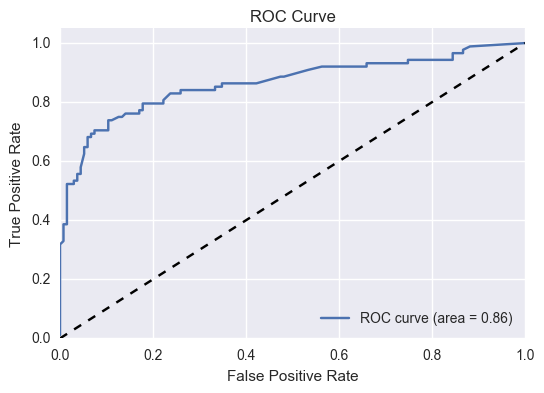

0.86388888888888893

In [233]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
def generate_roc_curve(clf, X, y, survived_weight=1, plot=False):
    """
    Generates an ROC curve and calculates the AUC 
    """
    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
    weights = np.array([survived_weight if s == 1 else 1 for s in y_train])
    clf.fit(X_train, y_train, sample_weight=weights)
    
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)

    print 'ROC AUC: %0.2f' % roc_auc

    if plot:
        # Plot of a ROC curve for a specific class
        #plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    
    return roc_auc
#forest = RandomForestClassifier(n_estimators=10000, n_jobs=-1)
    
generate_roc_curve(forest, X, y, plot=True)

# predict test data

In [210]:
test_df = pd.read_csv('../input/test.csv')

test_df = test_df.fillna(-1)
test_df["Sex"] = sex_label.transform(test_df["Sex"])

test_df['Age'] = test_df['Age'].map(lambda x : age_mean if x == -1 else x)

test_df["Embarked"] = embarked_label.transform(test_df['Embarked'])

test_passid = test_df['PassengerId'].values
print test_passid
test_X = test_df.drop(["PassengerId", "Cabin", "Name", "Ticket"], axis=1)

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905  906
  907  908  909  910  911  912  913  914  915  916  917  918  919  920  921
  922  923  924  925  926  927  928  929  930  931  932  933  934  935  936
  937  938  939  940  941  942  943  944  945  946  947  948  949  950  951
  952  953  954  955  956  957  958  959  960  961  962  963  964  965  966
  967  968  969  970  971  972  973  974  975  976  977  978  979  980  981
  982  983  984  985  986  987  988  989  990  991  992  993  994  995  996
  997  998  999 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011
 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026
 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056
 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071
 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086
 1087 1088 1

In [211]:
predict = lr.predict(test_X)
print predict

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [212]:
result = pd.DataFrame({
        "PassengerId":test_passid,
        'Survived' : predict
    })


In [213]:
result.to_csv("result.csv", index=False)
test = pd.read_csv("result.csv")
print test

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         0
7            899         0
8            900         0
9            901         0
10           902         0
11           903         0
12           904         0
13           905         0
14           906         0
15           907         0
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         0
22           914         0
23           915         0
24           916         0
25           917         0
26           918         0
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         0
392         1284         0
3